In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning & Functions
[Link to PISA](https://pisadataexplorer.oecd.org/ide/idepisa/report.aspx?p=1-RMS-1-20123,20033-MATHEFF12-TOTAL-IN3,AUS,AUT,BEL,CAN,CHL,COL,CZE,DNK,EST,FIN,FRA,DEU,GRC,HUN,ISL,IRL,ISR,ITA,JPN,KOR,LVA,LTU,LUX,MEX,NLD,NZL,NOR,POL,PRT,SVK,SVN,ESP,SWE,CHE,TUR,GBR,USA,ALB,QLB,DZA,ARG,QRG,BAK,BLR,BIH,BRA,BRN,QCH,QCI,BGR,TAP,CRI,HRV,QCY,DOM,GEO,HKG,IDN,JOR,KAZ,QAZ,KSV,LBN,MAC,MYS,QYS,MLT,MDA,MNE,MAR,MKD,PAN,PER,PHL,QAT,ROU,RUS,SAU,SRB,SGP,THA,TTO,TUN,UKR,ARE,URY,VNM-MN_MN-J-0_Y-2-37&Lang=1033)

Have had issues finding the definition of the indices used in the PISA '03 and '12. [This page](https://www.oecd-ilibrary.org/sites/0a428b07-en/index.html?itemId=/content/component/0a428b07-en) has some hints, but it's not for the same year. Probably the same (or similar) construction.

This is written with the intention of modifying as little as possible of what exports directly from the OECD data explorer tool. The only step I've not addressed here (re: cleaning) is removing the superscript footnote marks in variables---usually used to mark missing or "too small" cells. I just did a find/replace all in Excel. It was easier than figuring out the regex for a superscript '1' in a databased with a lot of numerics.

In [157]:
new_data = pd.read_excel('IDEExcelExport-Jan122023-1011PM.xls', skiprows=13, usecols="B:F", nrows=88,
                         sheet_name=None, na_values=["†", "—"])
df = pd.DataFrame()
for sheet_name, df_temp in new_data.items():
    sheet_name = sheet_name.replace("- Table", "")
    
    col_dict = {"Jurisdiction":     "Location",
                "Average":          sheet_name + "_avg_2012",
                "Standard Error":   sheet_name + "_se_2012",
                "Average.1":        sheet_name + "_avg_2003",
                "Standard Error.1": sheet_name + "_se_2003"}

    df_temp.rename(columns=col_dict, inplace=True)
    df_temp.dropna(inplace=True)
    df_temp.set_index("Location", inplace=True)
    df = df.merge(df_temp, how="right", right_on="Location", left_index = True)

In [158]:
def plotyplot(map_dict, data=df):

    x1 = map_dict['x03']
    y1 = map_dict['y03']
    x2 = map_dict['x12']
    y2 = map_dict['y12']

    for each in [(x1, y1), (x2, y2)]:
        sns.scatterplot(data=data, x=data[each[0]], y=data[each[1]])  \
            .set(title=map_dict['title'],
                 ylabel = "Self-efficacy",
                 xlabel = map_dict['x'])
    # Fix origin of self-efficacy axis to 0.
    # Add regression line to plots (https://www.python-graph-gallery.com/web-scatterplot-text-annotation-and-regression-matplotlib)
    # Separate plots (or make option) so they aren't overlaid


    plt.show()

## Self-efficacy and anxiety
The blue points are plotted first---2003.
The orange points are plotted second---2012.

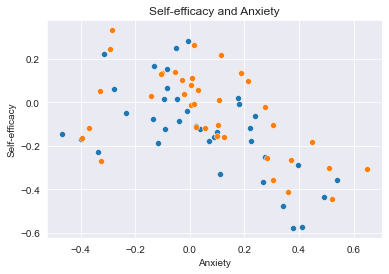

In [159]:
vari = {
    'y03':      'self_eff_avg_2003',
    'y12':      'self_eff_avg_2012',
    'x03':      'anxiety_avg_2003',
    'x12':      'anxiety_avg_2012',
    'idx':      'International Average (OECD)',
    'title':    'Self-efficacy and Anxiety',
    'x':        'Anxiety'
}

plotyplot(vari)

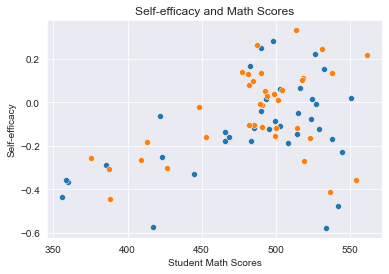

In [160]:
vari = {
    'y03':      'self_eff_avg_2003',
    'y12':      'self_eff_avg_2012',
    'x03':      'overall_score_avg_2003',
    'x12':      'overall_score_avg_2012',
    'idx':      'International Average (OECD)',
    'title':    'Self-efficacy and Math Scores',
    'x':        'Student Math Scores'
}

plotyplot(vari)

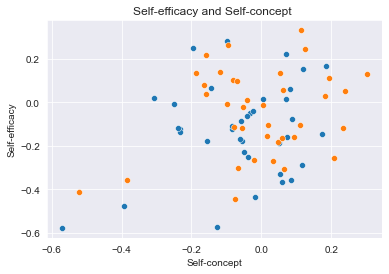

In [161]:
vari = {
    'y03':      'self_eff_avg_2003',
    'y12':      'self_eff_avg_2012',
    'x03':      'self_conc_avg_2003',
    'x12':      'self_conc_avg_2012',
    'idx':      'International Average (OECD)',
    'title':    'Self-efficacy and Self-concept ',
    'x':        'Self-concept'
}

plotyplot(vari)

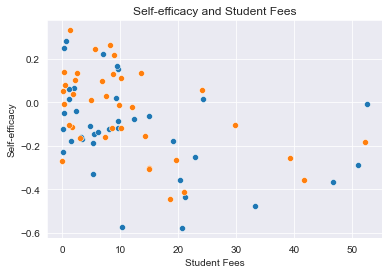

In [162]:
vari = {
    'y03':      'self_eff_avg_2003',
    'y12':      'self_eff_avg_2012',
    'x03':      'student_fees_avg_2003',
    'x12':      'student_fees_avg_2012',
    'idx':      'International Average (OECD)',
    'title':    'Self-efficacy and Student Fees',
    'x':        'Student Fees'
}

plotyplot(vari)